# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

from sklearn.neural_network import MLPRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

## Training the MLP model

### Grid Search

In [5]:
param = [{'activation': ['identity', 'logistic', 'tanh', 'relu']}]

gs = GridSearchCV(MLPRegressor(random_state=0, max_iter=1000, solver='adam'), param_grid=param, scoring='r2', cv = 10)
gs.fit(X_train_sc, y_train_sc.ravel())

model = gs.best_estimator_
print(gs.best_params_)

{'activation': 'tanh'}


### Cross Validation (R-Squared)

,Scores
Split 1,0.92006
Split 2,0.93396
Split 3,0.86432
Split 4,0.93197
Split 5,0.86271
Split 6,0.94622
Split 7,0.89546
Split 8,0.93025
Split 9,0.89680
Split 10,0.92724


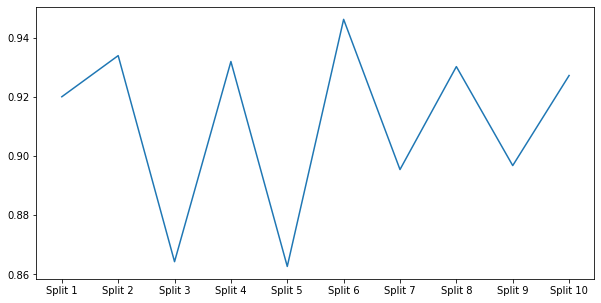

In [6]:
cv_scores(model, X_train_sc, y_train_sc)

### Testing data

,Value
Metric,
R2 Score,0.922150
MAE,42354.136897
RMSE,58409.951576


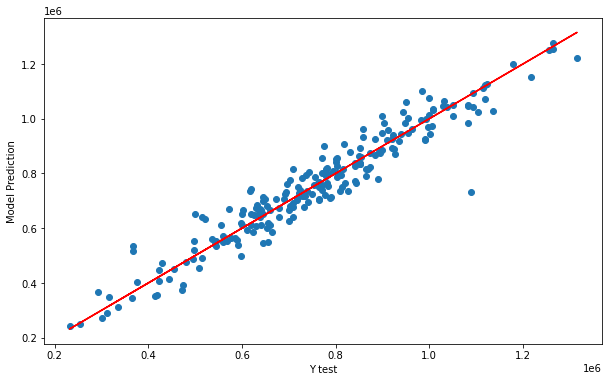

In [7]:
y_pred = model.predict(X_test_sc)

report(y_test, sc_y.inverse_transform(y_pred))